In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
 
#Getting the data ready
 
data = load_iris()
#Selecting certain features based on which clustering is done 
df = pd.DataFrame(data= np.c_[data['data']],
                     columns= data['feature_names'])

In [2]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


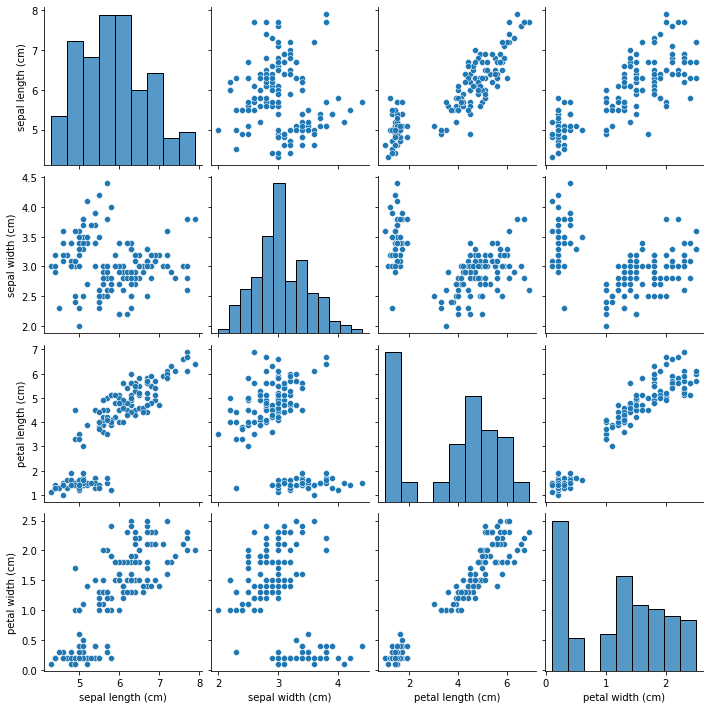

In [3]:
sns.pairplot(df)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_ss = scaler.fit_transform(df)

### Checking Best Cluster Using Elbow

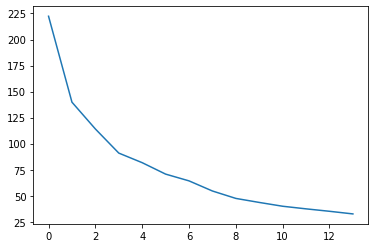

In [5]:
from sklearn.cluster import KMeans

ssd = []
range_n_clusters = list(np.arange(2,16))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_scaled_ss)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

### Get Best Cluster from Elbow

In [6]:
from kneed import KneeLocator
kl = KneeLocator(range(2, 16), ssd, curve="convex", direction="decreasing")
kl.elbow

5

### Modelling Using Best Elbow Value

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit(df_scaled_ss)
cluster_labels = kmeans.predict(df_scaled_ss)   

df['Cluster_Labels'] = cluster_labels
df['Cluster_Labels'].value_counts()

0    48
1    28
3    27
2    25
4    22
Name: Cluster_Labels, dtype: int64

In [13]:
x = df.iloc[:].values

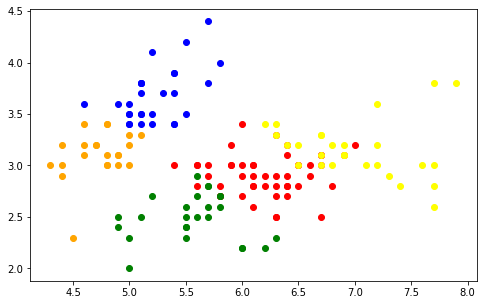

In [14]:
plt.figure(figsize = (8,5))
plt.scatter(x[cluster_labels == 0 , 0] , x[cluster_labels == 0 , 1] , c = 'red')
plt.scatter(x[cluster_labels == 1 , 0] , x[cluster_labels == 1 , 1] , c = 'blue')
plt.scatter(x[cluster_labels == 2 , 0] , x[cluster_labels == 2 , 1] , c = 'green')
plt.scatter(x[cluster_labels == 3 , 0] , x[cluster_labels == 3 , 1] , c = 'yellow')
plt.scatter(x[cluster_labels == 4 , 0] , x[cluster_labels == 4 , 1] , c = 'orange')
plt.show()

### Getting Best Clusters Using Silhouette Score

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
range_n_clusters = list(np.arange(2,16))

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_scaled_ss)
    
    cluster_labels = kmeans.predict(df_scaled_ss)
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled_ss, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5817500491982808
For n_clusters=3, the silhouette score is 0.45994823920518635
For n_clusters=4, the silhouette score is 0.4188923398171004
For n_clusters=5, the silhouette score is 0.3459012795948779
For n_clusters=6, the silhouette score is 0.3256773128015377
For n_clusters=7, the silhouette score is 0.3266056570078203
For n_clusters=8, the silhouette score is 0.3320632429012638
For n_clusters=9, the silhouette score is 0.35435822202392653
For n_clusters=10, the silhouette score is 0.34618084868425736
For n_clusters=11, the silhouette score is 0.35558607180963686
For n_clusters=12, the silhouette score is 0.36237674418606974
For n_clusters=13, the silhouette score is 0.3428354842631942
For n_clusters=14, the silhouette score is 0.3205495396502396
For n_clusters=15, the silhouette score is 0.3223813210262831


### Modelling Using Best Silhouette Score

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit(df_scaled_ss)
cluster_labels = kmeans.predict(df_scaled_ss)   

df['Cluster_Labels'] = cluster_labels
df['Cluster_Labels'].value_counts()

2    53
0    50
1    47
Name: Cluster_Labels, dtype: int64

In [17]:
x = df.iloc[:].values

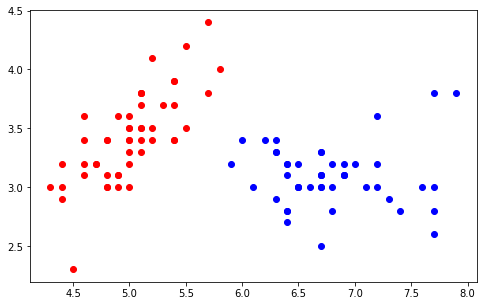

In [18]:
plt.figure(figsize = (8,5))
plt.scatter(x[cluster_labels == 0 , 0] , x[cluster_labels == 0 , 1] , c = 'red')
plt.scatter(x[cluster_labels == 1 , 0] , x[cluster_labels == 1 , 1] , c = 'blue')
# plt.scatter(x[cluster_labels == 2 , 0] , x[cluster_labels == 2 , 1] , c = 'green')
plt.show()